## [关于KMeans的评价及聚簇结果的得到](http://www.cnblogs.com/qqhfeng/p/5268133.html)

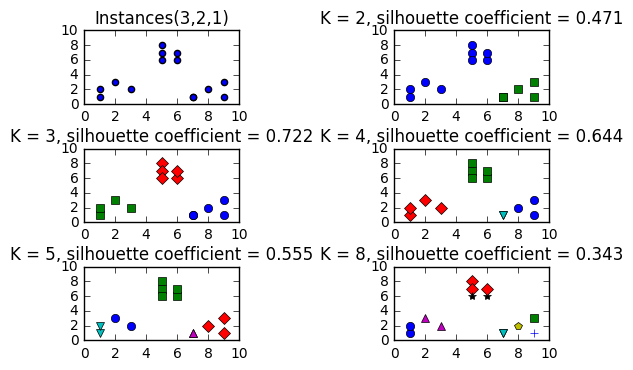

In [6]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
import matplotlib.pyplot as plt

x1 = np.array([1, 2, 3, 1, 5, 6, 5, 5, 6, 7, 8, 9, 7, 9])
x2 = np.array([1, 3, 2, 2, 8, 6, 7, 6, 7, 1, 2, 1, 1, 3])
#以下这句话在python3.4版本无效
#np.array(zip(x1, x2))转换出来的还是空的List对象
#X = np.array(zip(x1, x2)).reshape(len(x1), 2)
#vc1= zip(x1,x2) 中间的过程
X = np.array([(1, 1), (2, 3), (3, 2), (1, 2), (5, 8), (6, 6), (5, 7), (5, 6), (6, 7), (7, 1), (8, 2), (9, 1), (7, 1), (9, 3)])
#此处X，14行*2列,不用reshape(len(x1),2)

plt.subplots_adjust(wspace=1.0, hspace=0.6)
plt.subplot(3, 2, 1)
plt.xlim([0, 10])
plt.ylim([0, 10])
plt.title('Instances(3,2,1)')
plt.scatter(x1, x2)


colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'b']
markers = ['o', 's', 'D', 'v', '^', 'p', '*', '+']
tests = [2, 3, 4, 5, 8] #test是列表
subplot_counter = 1
for t in tests:
    subplot_counter += 1
    plt.subplot(3, 2, subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i, l in enumerate(kmeans_model.labels_): #非常重要，这就是结果呀
        plt.plot(x1[i], x2[i], color=colors[l], marker=markers[l],ls='None')
    plt.xlim([0, 10])
    plt.ylim([0, 10])
    plt.title('K = %s, silhouette coefficient = %.03f' % (t, metrics.silhouette_score(X, kmeans_model.labels_,metric='euclidean'))) #依据聚簇数量，计算性能值
plt.show()